In [115]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [116]:
#load Iris dataset for classification
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier(random_state=5, criterion = 'entropy')
pred = clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy of our model is equal 96.67 %.


In [120]:
#pruning of decision tree
clf1 = DecisionTreeClassifier(random_state=5, criterion = 'entropy', max_depth =2)
pred = clf1.fit(X_train,y_train)
predictions = clf1.predict(X_test)
print(classification_report(y_test,predictions))
accuracy = accuracy_score(y_test, predictions)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy of our model is equal 96.67 %.


In [111]:
model = clf1.fit(X, y)

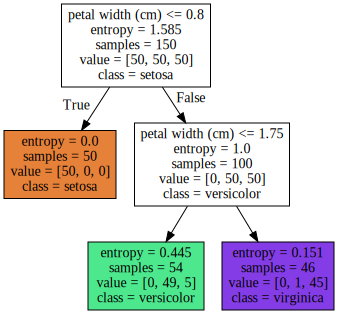

In [112]:
import graphviz
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

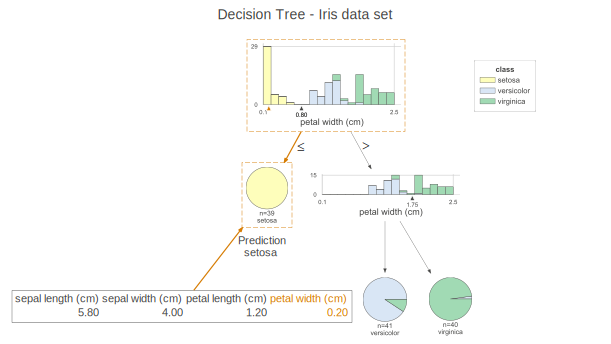

In [68]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clf1, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=iris.feature_names, 
               class_names=list(iris.target_names),
               title="Decision Tree - Iris data set",
               #orientation="LR", 
               X=X_test[0])  
viz

In [86]:
#KNN
#Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [87]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [88]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [104]:
# creating list of K for KNN
#minkowski, euclidean,chebyshev,manhattan, cosine
k_list = list(range(1,25,1))
# creating list of cv scores
scores = []
accuracies = []
# perform 10-fold cross validation
for k in k_list:
    model = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)
    scores.append(metrics.accuracy_score(y_test,pred))
    print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 1; Accuracy: 1.0
K = 2; Accuracy: 1.0
K = 3; Accuracy: 1.0
K = 4; Accuracy: 1.0
K = 5; Accuracy: 1.0
K = 6; Accuracy: 1.0
K = 7; Accuracy: 1.0
K = 8; Accuracy: 1.0
K = 9; Accuracy: 1.0
K = 10; Accuracy: 0.9666666666666667
K = 11; Accuracy: 0.9666666666666667
K = 12; Accuracy: 0.9666666666666667
K = 13; Accuracy: 0.9666666666666667
K = 14; Accuracy: 0.9666666666666667
K = 15; Accuracy: 0.9666666666666667
K = 16; Accuracy: 0.9666666666666667
K = 17; Accuracy: 0.9666666666666667
K = 18; Accuracy: 0.9666666666666667
K = 19; Accuracy: 0.9666666666666667
K = 20; Accuracy: 0.9666666666666667
K = 21; Accuracy: 0.9666666666666667
K = 22; Accuracy: 0.9666666666666667
K = 23; Accuracy: 0.9666666666666667
K = 24; Accuracy: 0.9666666666666667


Text(0, 0.5, 'Accuracy')

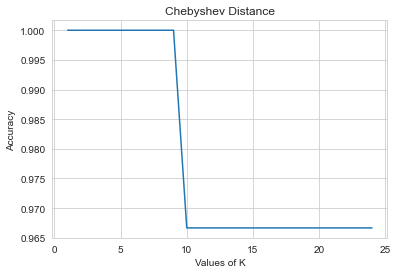

In [105]:
plt.plot(k_list, scores)
plt.title("Chebyshev Distance")
plt.xlabel('Values of K')
plt.ylabel('Accuracy')